<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/Laboratorio_05_NormalEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Normal equation
Se puede encontrar una solucion exacta para theta sin necesidad de emplear el gradiente descente de la sesiones pasadas, para ellos se puede encontrar el valor minimo de theta y a partir de alli determinar el valor de theta que minimiza J.

Los pasos para esta minimizacion se dejan como tarea, y pueden ser calculados según lo siguiente:

Si J es la funcion de coste dada por:

\begin{equation}
J(\theta_1,\theta_2,\theta_3, ...,\theta_n )=\frac{1}{2m} \sum_{i = 1}^m (\Theta^{T} X - \hat{y}^{(i)})^2
\end{equation}


Demostrar que:

- $J(\theta_1,\theta_2,\theta_3, ...,\theta_n ) = \frac{1}{2m} (\Theta ^ T X - y^T) (\Theta ^ T X - y^T)^T$

- $J= (\Theta ^T X) (\Theta ^T X)^T - 2(\Theta ^T X)Y  + Y^TY $


- $ \nabla _{\theta} J = \frac{1}{m} (2 X(X^T \Theta) -2XY)$


Para encontrar el valor minimo de \theta,  $\nabla _{\theta} J = 0$,

- $\Theta = (X^T X)^{-1} X^T y$



En este caso,tenemos que:

sea $X \in R^{n\times m}$ ,  $X^T \in R^{m\times n}$

sea $Y \in R^{m \times 1}$,  $Y^T \in R^{1 \times m}$

sea $\Theta \in R^{n \times 1}$, $\Theta^T \in R^{1 \times n}$




Para la demostracion anterior emplee las siguientes propiedades:

- $z^T z= \sum_i z_i^2$
- $a^T b = b^Ta$
- $\nabla _x b^T x = b$
- $\nabla _x  x^T A x = 2Ax$

donde a, b, x son matrices, $\nabla_x$ es la derivada respecto al vector x, y A es una matriz simétrica




1. Para los datos del laboratorio anterior aplicar la ecuacion normal.
2. Tomar el dataset de las casas de Boston y construir un modelo de regresión mutivariada.

```
# Tomar los datos de las casas de boston y hacer una regresion lineal tomando
# el average number of rooms per dwelling.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame({"mean_":target, "rm":data[:,5]})

```

In [103]:
# Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

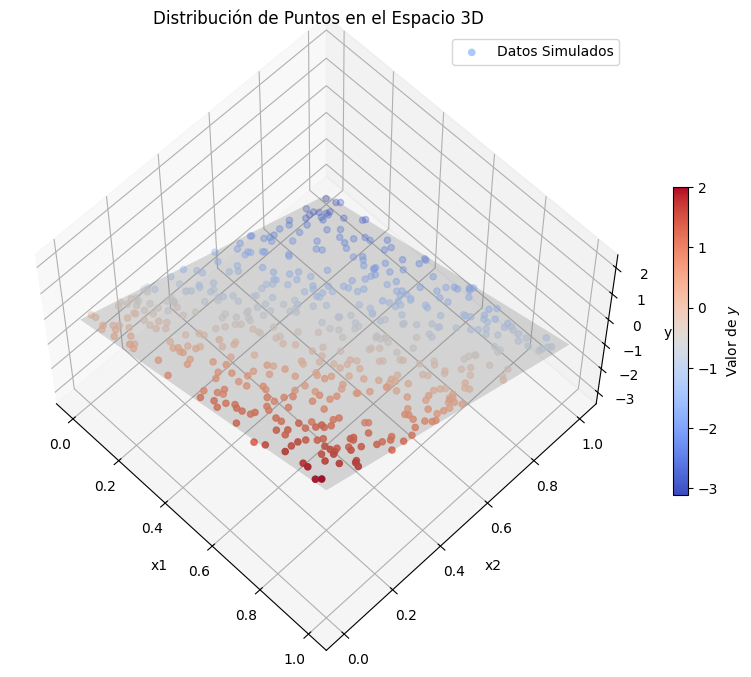

Dimensiones x1: (500,)
Dimensiones x2: (500,)
Dimensiones y: (500,)


In [104]:
# Configuración inicial
np.random.seed(42) # Semilla para reproducibilidad
m = 500 # Número de muestras

# 1. Generar características aleatorias (x1, x2)
# Generamos m datos entre 0 y 1
x1 = np.random.rand(m)
x2 = np.random.rand(m)

# 2. Definir la ecuación del plano (Generar Target Y)
# y = theta0 + theta1*x1 + theta2*x2
# theta0 = 0, theta1 = 2.1, theta2 = -3.1
y = 2.1 * x1 - 3.1 * x2 + 0.05 * np.random.randn(m)

# Creación del plano ideal para referencia visual
x1_range = np.linspace(0, 1, 20)
x2_range = np.linspace(0, 1, 20)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)
Y_mesh = 2.1 * X1_mesh - 3.1 * X2_mesh 

# 3. Realizar diagrama 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar el plano (transparente) para dar contexto
ax.plot_surface(X1_mesh, X2_mesh, Y_mesh, alpha=0.2, color='gray')

# Graficar puntos
img = ax.scatter(xs=x1, ys=x2, zs=y, c=y, cmap='coolwarm', marker='o', label='Datos Simulados') # type: ignore

# Ángulo de visión
# Elevación de 60 grados, azimut de -45 grados para ver la pendiente
ax.view_init(elev=60, azim=-45)

# Etiquetas
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title("Distribución de Puntos en el Espacio 3D")
ax.legend()

fig.colorbar(img, ax=ax, label='Valor de $y$', shrink=0.5)

plt.show()

# Verificación rápida de dimensiones
print(f"Dimensiones x1: {x1.shape}")
print(f"Dimensiones x2: {x2.shape}")
print(f"Dimensiones y: {y.shape}")

In [105]:
# 2. Inicialización aleatoria de parámetros (3 filas, 1 columna)
theta = np.random.randn(3, 1) 
alpha = 0.1
iterations = 1000
cost_history = []

In [106]:
# 3. Preparación de la Matriz X (n+1, m)
# n=2 características + 1 del intercepto = 3 filas
X = np.vstack([np.ones(m), x1, x2]) # Dimensión: (3, 500)
Y = y.reshape(1, m)                 # Dimensión: (1, 500)

In [107]:
# Configuración de hiperparámetros (si no estaban definidos antes)
alpha = 0.1  # Tasa de aprendizaje
iterations = 1000
cost_history = []

# --- BUCLE DE ENTRENAMIENTO (Pasos 4, 5 y 6) ---
for i in range(iterations):
    
    # --- PASO 4: Calcular la función de coste ---
    # h = Theta^T * X
    h = np.dot(theta.T, X)  # Resultado: (1, m)
    
    # Lambda (Error) = h - Y
    error = h - Y           # Resultado: (1, m)
    
    # J = (1/2m) * sum(error^2)
    J = (1 / (2 * m)) * np.sum(error ** 2)
    cost_history.append(J)
    
    # --- PASO 5: Aplicar gradiente descendente ---
    # Encontrar el gradiente
    # Nota: Usamos X @ error.T para obtener dimensiones (3, 1) igual que theta
    # Esto equivale algebraicamente a (error @ X.T).T
    grad = (1 / m) * np.dot(X, error.T) 
    
    # Actualizar parámetros: Theta = Theta - alpha * grad
    theta = theta - (alpha * grad)

# --- PASO 6: Resultados finales (Iteración completa) ---
print("--- Resultados del Entrenamiento ---")
print("Theta obtenido vs Esperado:")
print(f"Intercepto (0):   {theta[0][0]:.4f}")
print(f"Pendiente x1 (2.1): {theta[1][0]:.4f}")
print(f"Pendiente x2 (-3.1): {theta[2][0]:.4f}")

# # Opcional: Graficar la convergencia
# plt.plot(cost_history)
# plt.title("Convergencia del Costo J")
# plt.xlabel("Iteración")
# plt.ylabel("Costo")
# plt.show()

--- Resultados del Entrenamiento ---
Theta obtenido vs Esperado:
Intercepto (0):   0.0102
Pendiente x1 (2.1): 2.0860
Pendiente x2 (-3.1): -3.0948


In [108]:
# 7. Graficar la convergencia del coste

class RegresionNormal:
    def __init__(self):

        self.theta = None
        
    def fit(self, X, Y):
        # Agregar Bias 
        if not np.all(X[0] == 1):
             X_b = np.vstack([np.ones(X.shape[1]), X])
        else:
             X_b = X
        
        # 2. CALCULO DIRECTO 
        # Fórmula: Theta = (X * X.T)^-1 * X * Y.T
        # Nota: Como los datos están transpuestos (filas=features), la fórmula se ajusta.
        
        A = np.dot(X_b, X_b.T)       # (n, n)
        B = np.linalg.inv(A)         # Inversa
        C = np.dot(X_b, Y.T)         # (n, 1)
        
        self.theta = np.dot(B, C)    # Resultado

    def predict(self, X_new):
        # Asegurar Bias también en predicción
        if not np.all(X_new[0] == 1):
             X_new = np.vstack([np.ones(X_new.shape[1]), X_new])
        return np.dot(self.theta.T, X_new) # type: ignore

In [109]:
# Datos (ejemplo)
X_in = np.vstack([x1, x2])

# Instanciar el modelo de Regresión Normal
modelo = RegresionNormal() # No pide parámetros extra

# Entrenar (Mandar al robot a trabajar)
modelo.fit(X_in, Y) 

# Para la Ecuación Normal
print("\n--- Método: Normal ---")
# Verificamos si theta tiene algo
if modelo.theta is not None:
    print("Theta Normal:   ", modelo.theta.flatten())
    prediccion = modelo.predict(X_in)
    print("Predicción completada.")
else:
    print("Error: El modelo Normal no se entrenó (theta es None).")


--- Método: Normal ---
Theta Normal:    [ 0.01255865  2.08460908 -3.0980143 ]
Predicción completada.


In [112]:
print("--- CARGANDO DATASET DE BOSTON ---")

# 1. Cargar el dataset
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(data_url)

# 2. Separar Características (X) y Objetivo (Y)
# Usamos .to_numpy() para asegurar que sea un array de Numpy puro
X_raw = df.drop('medv', axis=1).to_numpy() 
Y_raw = df['medv'].to_numpy()              

# 3. ADAPTACIÓN DE DIMENSIONES
X_boston = X_raw.T
Y_boston = Y_raw.reshape(1, -1) 

print(f"Dimensiones para tu clase:")
print(f"X: {X_boston.shape}")
print(f"Y: {Y_boston.shape}")

# ---------------------------------------------------------
# APLICACIÓN DE LA CLASE 'RegresionNormal'
# ---------------------------------------------------------
print("\n--- ENTRENANDO MODELO (ECUACIÓN NORMAL) ---")

# 1. Instanciar
modelo_boston = RegresionNormal()

# 2. Entrenar
# Nota: La clase agregará automáticamente la fila de 1s (Bias)
modelo_boston.fit(X_boston, Y_boston)

# 3. Resultados
if modelo_boston.theta is not None:
    print("¡Entrenamiento Exitoso!")
    print("\nCoeficientes (Theta) obtenidos para Boston:")
    # Aplanamos para leerlo mejor
    print(modelo_boston.theta.flatten())
    
    # -----------------------------------------------------
    # PRUEBA DE PREDICCIÓN (Tomamos la primera casa real)
    # -----------------------------------------------------
    casa_ejemplo = X_boston[:, 0].reshape(-1, 1) # Primera columna
    valor_real = Y_boston[0, 0]
    
    prediccion = modelo_boston.predict(casa_ejemplo)
    
    print(f"\n--- Validación Rápida ---")
    print(f"Precio Real de la casa #1:     ${valor_real * 1000}")
    print(f"Precio Predicho por tu modelo: ${prediccion[0][0] * 1000:.2f}")
    
    error = abs(valor_real - prediccion[0][0])
    print(f"Diferencia: ${error * 1000:.2f}")
    
else:
    print("Error: El modelo no calculó Theta.")

--- CARGANDO DATASET DE BOSTON ---
Dimensiones para tu clase:
X: (13, 506)
Y: (1, 506)

--- ENTRENANDO MODELO (ECUACIÓN NORMAL) ---
¡Entrenamiento Exitoso!

Coeficientes (Theta) obtenidos para Boston:
[ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]

--- Validación Rápida ---
Precio Real de la casa #1:     $24000.0
Precio Predicho por tu modelo: $30003.84
Diferencia: $6003.84
